# Assignment 4

In [1]:
# Due date: 04/26/2023

In this assignment, using `credit_data_risk.csv` data and pick 2 machine learning models of your choice to estimate the credit risk. Please do not use the **same machine learning algorithm** that we used in the class.

Note: Please do not forget to interpret your result!

In [3]:
# codes here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [51]:
url = 'https://github.com/Sahith4311/dataset/raw/main/credit_data_risk.csv'
read_data = pd.read_csv(url)

In [52]:
read_data #observing the data

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [53]:
read_data.info() #checking null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [54]:
x= (read_data.Risk == 'good').sum()
y= (read_data.Risk == 'bad').sum()

'the distribution of good class',x ,'the distibution of bad class',y

('the distribution of good class', 700, 'the distibution of bad class', 300)

In [55]:
read_data.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

Filling up the null values, since the data we have just 1000 rows, I don't want to lose any related information.

In [56]:
read_data=read_data.fillna(method='ffill')
read_data.isna().sum()


Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     1
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

Converting the job' data into categorical, this will help us in modelling the data using one hot encoding

In [57]:
read_data['Job'] = read_data['Job'].map({0:'unskilled and non-resident',1:'unskilled and resident',2:'skilled',3:'highly skilled'})

Converting the good and bad classes to binary 0 and 1 respectively. 
These are our labels

In [58]:
read_data['Risk'] = read_data['Risk'].map({'good':0,'bad':1})

Extracting numeric columns, as they should be bought on to a similar scale for easier processing, while fitting through a model.

Here I am going to use, StandardScaler() function from sklearn library, for normalizing the values.

In [59]:
numerica_data =read_data[['Age','Credit amount','Duration']]

In [60]:
numerica_data  = read_data[['Age','Credit amount','Duration']]
numerica_data

,Age,Credit amount,Duration
0,67,1169,6
1,22,5951,48
2,49,2096,12
3,45,7882,42
4,53,4870,24
...,...,...,...
995,31,1736,12
996,40,3857,30
997,38,804,12
998,23,1845,45


In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scaled = StandardScaler().fit_transform(numerica_data)

In [63]:
df_scaled = pd.DataFrame(scaled, columns=[['Age','Credit amount','Duration']]) 

Now, the next step is to deal with categorical data. We can do this by encoding each feature into a vector embedding type.

In [64]:
categorical_data = ['Sex','Job','Housing','Saving accounts','Checking account','Purpose']
df_one_hot = pd.get_dummies(read_data[categorical_data])

It is now time to concatenate both numeric and categorical values.

In [65]:
total_df = df_scaled.join(df_one_hot)
total_df

,"(Age,)","(Credit amount,)","(Duration,)",Sex_female,Sex_male,Job_highly skilled,Job_skilled,Job_unskilled and non-resident,Job_unskilled and resident,Housing_free,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,2.766456,-0.745131,-1.236478,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,-1.191404,0.949817,2.248194,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,1.183312,-0.416562,-0.738668,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
3,0.831502,1.634247,1.750384,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,1.535122,0.566664,0.256953,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.399832,-0.544162,-0.738668,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
996,0.391740,0.207612,0.754763,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
997,0.215835,-0.874503,-0.738668,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
998,-1.103451,-0.505528,1.999289,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(total_df.values, read_data.Risk,
                                                    test_size=0.2, random_state=42) #splitting the model into train and test splits

Here I am choosing, RandomForestClassifer and the GaussianNB as the two machine learning models.

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

##Random Forest

In [69]:
random_forest_model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth = 100)

In [70]:
random_forest_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=100)

In [74]:
y_predicted = random_forest_model.predict(X_train)

In [76]:
print("Classification report of training_data")
print(classification_report(y_train,y_predicted))

Classification report of training_data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       559
           1       1.00      1.00      1.00       241

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [77]:
y_test_pred = random_forest_model.predict(X_test)

In [78]:
print("Classification report of test_data")
print(classification_report(y_test.values,y_test_pred))

Classification report of test_data
              precision    recall  f1-score   support

           0       0.73      0.94      0.82       141
           1       0.53      0.17      0.26        59

    accuracy                           0.71       200
   macro avg       0.63      0.55      0.54       200
weighted avg       0.67      0.71      0.65       200



In [79]:
from sklearn.metrics import roc_auc_score, roc_curve,confusion_matrix

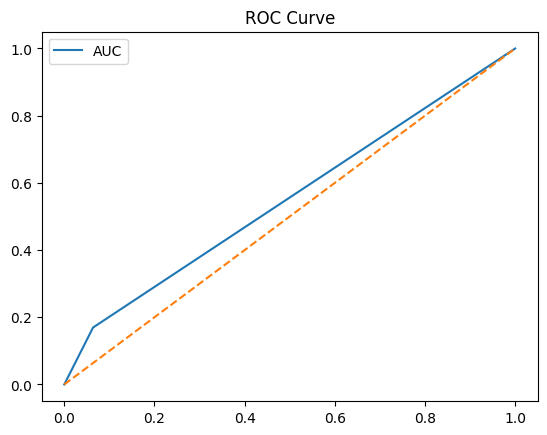

In [80]:
false_pos, true_pos, _ = roc_curve(y_test.values, y_test_pred) 
auc = roc_auc_score(y_test, y_test_pred)
plt.plot(false_pos, true_pos, label='AUC'.format(auc))
plt.plot([0, 1], [0,1], linestyle='--')
plt.legend()
plt.title('ROC Curve')
plt.show()

In [81]:
print(confusion_matrix(y_train.values,y_predicted))

[[559   0]
 [  0 241]]


In [82]:
print(confusion_matrix(y_test.values,y_test_pred))

[[132   9]
 [ 49  10]]


##Gaussian Naive Bayes

In [83]:
gaussian_Nb = GaussianNB()

In [84]:
gaussian_Nb.fit(X_test,y_test)

GaussianNB()

In [85]:
predicted_train = gaussian_Nb.predict(X_train)
predicted_test = gaussian_Nb.predict(X_test)

In [89]:
print(classification_report(y_train.values, predicted_train))

              precision    recall  f1-score   support

           0       0.79      0.18      0.29       559
           1       0.32      0.89      0.47       241

    accuracy                           0.39       800
   macro avg       0.55      0.53      0.38       800
weighted avg       0.64      0.39      0.34       800



In [90]:
print(confusion_matrix(y_train.values, predicted_train))

[[ 99 460]
 [ 27 214]]


In [91]:
print(classification_report(y_test.values, predicted_test))

              precision    recall  f1-score   support

           0       0.90      0.13      0.22       141
           1       0.32      0.97      0.48        59

    accuracy                           0.38       200
   macro avg       0.61      0.55      0.35       200
weighted avg       0.73      0.38      0.30       200



In [92]:
print(confusion_matrix(y_test.values, predicted_test))

[[ 18 123]
 [  2  57]]


In [93]:
roc_auc_score(y_test.values, predicted_test)

0.5468806346916697

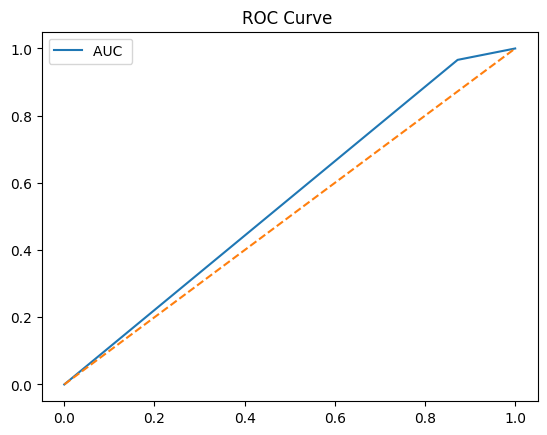

In [94]:
false_pos, true_pos, _ = roc_curve(y_test.values, predicted_test) 
auc = roc_auc_score(y_test, predicted_test)
plt.plot(false_pos, true_pos, label='AUC '.format(auc))
plt.plot([0, 1], [0,1], linestyle='--')
plt.legend()
plt.title('ROC Curve ')
plt.show()

When the first ran the model through RandomForest, the model seemed to be over fitting the data, which resulted in the high accuracy, precision, and recall. 


Where as with the model, GaussianNB, the model this time tries not to overfit but the classification on the test set was again biased. Random forest model is better to predict the credit risk.